# Dealing With Missing Data Using `date_range`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import timedelta

%matplotlib inline

## Create an incomplete series of random data (some dates missing)

In [2]:
dates = []
numbers = []
start_date = pd.Timestamp("2020-01-01")
date = start_date

for i in range(31):
    dates.append(date)
    numbers.append(np.sin((date - start_date).days / 20))
    
    # Increment date or skip ahead to simulate missing data
    if date == pd.Timestamp('2020-01-13'):
        inc = 10  # days
    else:
        inc = 1
    date = date + pd.Timedelta(days=inc)

index = pd.Index(dates, name='Date')
df_random_data = pd.DataFrame(numbers, index=index, columns=['Numbers'])

In [3]:
df_random_data.loc['2020-01-12':'2020-01-24']

,Numbers
Date,
2020-01-12,0.522687
2020-01-13,0.564642
2020-01-23,0.891207
2020-01-24,0.912764


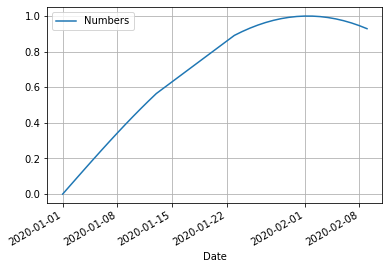

In [4]:
# What if we try to plot this?
df_random_data.plot(grid=True)
plt.show()

In [5]:
# Looks okay, but is it?
# Note: There is a gap in the data!

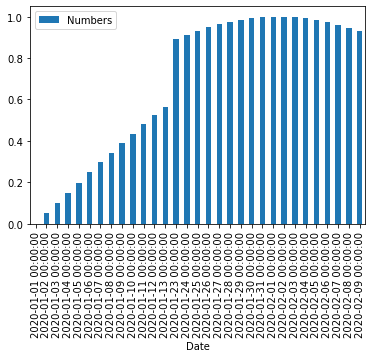

In [6]:
# To see the gap, we can make a bar plot
# Bar plots assume the data is categorical
df_random_data.plot.bar()
plt.show()

In [7]:
# Before we plot this, we might want to add NaNs or zeros 
# for the days with no data - for example, maybe we know 
# there was a shutdown during these days and therefore 
# production is zero.

In [8]:
# First create a date range that is complete
start_date = df_random_data.first_valid_index()
end_date = df_random_data.last_valid_index()

my_date_range = pd.date_range(start_date, end_date, freq='D')
my_date_range

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09'],
              dtype='datetime64[ns]', freq='D')

In [9]:
index = pd.Index(my_date_range, name="date")

df_complete = pd.DataFrame(data=df_random_data, index=index)
df_complete.loc['2020-01-12':'2020-01-24']

,Numbers
date,
2020-01-12,0.522687
2020-01-13,0.564642
2020-01-14,NaN
2020-01-15,NaN
2020-01-16,NaN
2020-01-17,NaN
2020-01-18,NaN
2020-01-19,NaN
2020-01-20,NaN


In [10]:
# Replace NaNs with zeros
#df_complete = df_complete.fillna(0)
#df_complete.loc['2015-01-12':'2015-01-24']

In [11]:
df_complete = df_complete.reset_index()
df_complete['Week Number'] = df_complete['date'].dt.week
df_complete = df_complete.set_index('date', drop=True)
df_complete.loc['2020-01-12':'2020-01-24']

,Numbers,Week Number
date,,
2020-01-12,0.522687,2
2020-01-13,0.564642,3
2020-01-14,NaN,3
2020-01-15,NaN,3
2020-01-16,NaN,3
2020-01-17,NaN,3
2020-01-18,NaN,3
2020-01-19,NaN,3
2020-01-20,NaN,4


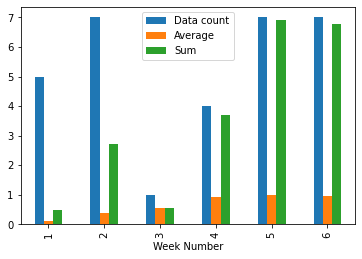

In [12]:
weekly_data = pd.DataFrame({
    'Data count': df_complete.groupby('Week Number')['Numbers'].count(),
    'Average':  df_complete.groupby('Week Number')['Numbers'].mean(),
    'Sum':  df_complete.groupby('Week Number')['Numbers'].sum()
})
weekly_data.plot.bar()
plt.show()